<div style="border:solid Chocolate 2px; padding: 40px">

<b>Hello, Ferdinand!👋 How are you today?</b>
    
My name is Arina U. and I am glad to be your reviewer in this project! Nice to meet you!<br />


You can find my comments in <font color='green'>green</font>, <font color='gold'>yellow</font> and <font color='red'>red</font> boxes. Examples you can see below:
    
<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍:</b> In case if task is completely correct and everything is alright!
</div>


<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary</h2>
    <br/>
<b>Remarks and recommendations📌:</b>  In case when I can give some advice that can help you to improve your work or recommend you some useful links and resources that can help you widen your knowledge and help in future tasks.
</div>

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Needs fixing!🤔:</b> In case when step requires some extra work and some corrections. Project can't be accepted with comments in the red boxes
</div>

Please pay attention to not move or change my comments. It would be good to highlight your answers in some way. 

#### <font color='Purple'>Student's commentary:</font> for example like this</div>
    
OK, now let's go!😏
</font>

# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collect## 1 General examination of the dataed over the last few years and determine which factors influence the price of a vehicle.

First, the data is examined in general to find duplicates, missing values and columns with wrong data types. These identified problems will be fixed in the second step. After the data has been preprocessed, histograms and boxplots are printed to graphically evaluate the spectrum of the data. In the next step, a new data set is created in which outliers are removed. This data set will be used in the further process. New histograms and boxplots are printed and compared with the graphs from the unfiltered data set. Then, the column "days_listed" is examined more closely to determine if the duration of an ad depends on another column. Finally, the dependence of the price on the columns "condition", "miles_per_year" and "vehicle_age" is examined.

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary </h2>
    <br/>
<b>Remarks and recommendations📌:</b>

Ferdinand, it is great that you started your project with the short introduction. I would like to recommend you to add the content plan of the main steps of your analysis at the beginning of the project! At links below you can find information about how to create the content plan with hyperlinks in Markdown cells:

https://sebastianraschka.com/Articles/2014_ipython_internal_links.html 

https://coderoad.ru/11948245/Markdown-для-создания-страниц-и-оглавления
    
https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd

## General examination of the data

### Open the data file and study the general information. import pandas as pd

import numpy as np
data = pd.read_csv("/datasets/vehicles_us.csv")
data.info()
data.describe()


From the printed table above, I learned that there are some wrong datatypes in some of the columns:

    - model_year
    - cylinders
    - is_4wd
    - date_posted

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("/datasets/vehicles_us.csv")
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


From the printed table above, I learned that there are some wrong datatypes in some of the columns:

    - model_year
    - cylinders
    - is_4wd
    - date_posted

### Searching for duplicates

In [2]:
print(len(data))
print(len(data.drop_duplicates()))

51525
51525


### Searching for missing values

In [3]:
# Function to count missing values for each columns in a DataFrame
def missing_data(data):
    # Count number of missing value in a column
    total = data.isnull().sum()           
    
    # Get Percentage of missing values
    percent = (data.isnull().sum()/data.isnull().count()*100)   
    temp = pd.concat([total, percent], axis=1, keys=['Total', 'Percent(%)'])

    # Create a Type column, that indicates the data-type of the column.
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    temp['Types'] = types

    return(np.transpose(temp))

missing_data(data)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
Total,0,3619,0,0,5260,0,7892,0,0,9267,25953,0,0
Percent(%),0,7.02377,0,0,10.2086,0,15.3168,0,0,17.9854,50.3697,0,0
Types,int64,float64,object,object,float64,object,float64,object,object,object,float64,object,int64


columns with missing values: 

    - model_ year, 7.0% --> replace with median
    - cylinders, 10.2% --> replace with median
    - odometer, 15.3% --> replace with mean
    - paint_color, 18.0% --> no replacement, because it's a string
    - is_4wd, 50.4% --> replacement with FALSE / 0, because the data in this column only contain TRUE / 1 -values

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, you have created very interesting function here, good job!

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary</h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
    
Another, moree pythonic way to look not just at the amount of missing values in every column, but at the percentage of missing values in columns, this can be done by slightly changing your code, for example, like this:
    
`data.isnull().sum()*100/len(data)`

Or like this:
    
`report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)`

### Conclusion

The available data must be revised, because on the one hand there are wrong data types in some columns and on the other hand values are missing. There are no duplicates.

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Needs fixing!🤔:</b> 
 
There is no conclusion here! it is important to finish each step with conclusion. After the first step you need to formulate what problem you have found in the data, what about the correctness of the data types, are there dublicates and artefacts in te data? So, please, try to improve it!

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review</h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, see your corrections!

## Data preprocessing

Since the problems in the data have been identified, they are now being fixed. First, the missing values will be replaced:
Then the data types in some columns are changed.

### Replace missing values

In [4]:
missing_data(data)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
Total,0,3619,0,0,5260,0,7892,0,0,9267,25953,0,0
Percent(%),0,7.02377,0,0,10.2086,0,15.3168,0,0,17.9854,50.3697,0,0
Types,int64,float64,object,object,float64,object,float64,object,object,object,float64,object,int64


In [5]:
#calculate the median / mean of the columns with missing values
model_year_median = data["model_year"].median()

cylinders_median = data["cylinders"].median()

odometer_mean = data["odometer"].mean()

data.loc[data["model_year"].isna(), "model_year"] = model_year_median

data.loc[data["cylinders"].isna(), "cylinders"] = cylinders_median

data.loc[data["odometer"].isna(), "odometer"] = odometer_mean

data.loc[data["is_4wd"].isna(), "is_4wd"] = False

data.loc[data["paint_color"].isna(), "paint_color"] = "unknown"

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary </h2>
    <br/>
<b>Remarks and recommendations📌:</b> 

Ferdinand, some recommendations about filling of missing values in columns odometer, cylinders, model_year, and price columns. 
    
Columns odometer, cylinders, model_year, and price have numeric data, so we can study their correlation with the categorical variables from the dataset.

It would be reasonable to assume that the mileage and price correlate with the condition of the vehicle, and the number of cylinders and year with its model. And we can replace missing values with the medians, grouping the data by these parameters.
    
One more way is to build the correlation matrix, check what factors are correlated (you have mentioned this alternative) and fill in the missing values based on correlation and grouping methods.
    
Filling in missing values with simply a median or mean by a column is a rather risky strategy and is only acceptable for cases where no more than 10% of the data is missing in our dataframe. The risk is that such an approach can lead to distortion of the initial data and, as a result, we will get a biased estimate based on the analysis results.
    
Remember, that it is important not only to fill in the missing values using some method, but also to give arguments why this particular method in this particular case is adequate and correct. And it is better to connect the strategy you choose for filling in missing values with the hypotheses about why there are missing values in the data, why they occur.

    
P.S. As for paint_color column it is better to change the missing values in this column to 'unknown'

### Convert the data to the required types

columns with wrong types (COLUMN NAME, TYPE --> NEW TYPE):

    - model_year, float --> int
    - cylinders, float --> int
    - is_4wd, float --> boolean
    - date_posted, string --> datetime

In [6]:
data.info()
 
data["model_year"] = data["model_year"].astype(np.int16) 
data["cylinders"] = data["cylinders"].astype(np.int16) 
data["is_4wd"] = data["is_4wd"].astype(np.bool) 
#data["date_listed"] = data["date_listed"].astype(np.bool) 
data["date_posted"] = pd.to_datetime(data["date_posted"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null float64
fuel            51525 non-null object
odometer        51525 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null object
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(3), int64(2), object(8)
memory usage: 5.1+ MB


<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary </h2>
    <br/>
<b>Remarks and recommendations📌:</b> 
    
You have forgotten about the data types change in the case of columns dayes_listed and days_posted, it is better to change data types here to datetime.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review</h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, well, I can see that you have changed the data types, everything is alright!

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null int16
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null int16
fuel            51525 non-null object
odometer        51525 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int16(2), int64(2), object(6)
memory usage: 4.2+ MB


In [8]:
def getConditionNumber(condition):
    if condition == "new":
        return 5
    elif condition == "like new":
        return 4
    elif condition == "excellent":
        return 3
    elif condition == "good":
        return 2
    elif condition == "fair":
        return 1
    elif condition == "salvage":
        return 0
    
    
data['condition'] = data['condition'].apply(getConditionNumber)

print(data.head())

   price  model_year           model  condition  cylinders fuel  \
0   9400        2011          bmw x5          2          6  gas   
1  25500        2011      ford f-150          2          6  gas   
2   5500        2013  hyundai sonata          4          4  gas   
3   1500        2003      ford f-150          1          8  gas   
4  14900        2017    chrysler 200          3          4  gas   

        odometer transmission    type paint_color  is_4wd date_posted  \
0  145000.000000    automatic     SUV     unknown    True  2018-06-23   
1   88705.000000    automatic  pickup       white    True  2018-10-19   
2  110000.000000    automatic   sedan         red   False  2019-02-07   
3  115553.461738    automatic  pickup     unknown   False  2019-03-22   
4   80903.000000    automatic   sedan       black   False  2019-04-02   

   days_listed  
0           19  
1           50  
2           79  
3            9  
4           28  


<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍:</b> 
    
As for preprocessing the `condition` column, everything is alright, again, your function works well!

### Add columns to the table

The following columns should be added to the table:

    - Day of the week, month, and year the ad was placed
    - The vehicle's age (in years) when the ad was placed
    - The vehicle's average mileage per year

In [9]:
#Day of the week, month, and year the ad was placed
data['day_of_week'] = pd.DatetimeIndex(data['date_posted']).day_name()
data['day'] = pd.DatetimeIndex(data['date_posted']).day
data['month'] = pd.DatetimeIndex(data['date_posted']).month 
data['year'] = pd.DatetimeIndex(data['date_posted']).year 


#The vehicle's age (in years) when the ad was placed
data["vehicle_age"] = data['year'] - data["model_year"] + 1

#The vehicle's average mileage per year
data["mileage_per_year"] = (data["odometer"] / data["vehicle_age"])

data["mileage_per_year"] = data["mileage_per_year"].astype(int)
print(data.head())

   price  model_year           model  condition  cylinders fuel  \
0   9400        2011          bmw x5          2          6  gas   
1  25500        2011      ford f-150          2          6  gas   
2   5500        2013  hyundai sonata          4          4  gas   
3   1500        2003      ford f-150          1          8  gas   
4  14900        2017    chrysler 200          3          4  gas   

        odometer transmission    type paint_color  is_4wd date_posted  \
0  145000.000000    automatic     SUV     unknown    True  2018-06-23   
1   88705.000000    automatic  pickup       white    True  2018-10-19   
2  110000.000000    automatic   sedan         red   False  2019-02-07   
3  115553.461738    automatic  pickup     unknown   False  2019-03-22   
4   80903.000000    automatic   sedan       black   False  2019-04-02   

   days_listed day_of_week  day  month  year  vehicle_age  mileage_per_year  
0           19    Saturday   23      6  2018            8             18125  
1 

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary</h2>
    <br/>
<b>Remarks and recommendations📌:</b> 
    
Pandas library allows to add the month, year and weekday using methods like  `day_name()` и `month_day()`.
    
More information here:
    
https://www.geeksforgeeks.org/python-pandas-series-dt-day_name/
    
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.day_name.html
    
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.month_name.html
    
https://www.geeksforgeeks.org/python-pandas-series-dt-month_name/

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary </h2>
    <br/>
<b>Remarks and recommendations📌:</b> 
    
Ok, you are absolutely right about the 0 values, we cannot devide by zero:) one tip is to add 1 to the values in column that has zero values. You calculate the lifetime of the car subtracting the model_data from year_posted, add one to the result and then you divided odometer by lifetime and get average mileage. 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review</h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, see your improvements, everything is alright!

### Conclusion

The missing values have been replaced, wrong data types have been changed and new columns have been added that will be needed in the following steps. It is important to mention that it would be more precise to replace the missing values with more specific mean values. For example, it would be possible to calculate a separate "odometer" average for each "condition" value.

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Needs fixing!🤔:</b> 
 
again, please, add the conclusion after this step of the analysis!

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review</h2>
    <br/>
<b>Well done!👍</b> 


## Carry out exploratory data analysis

### Plotting histograms and boxplots

#### Price

Text(0, 0.5, 'count')

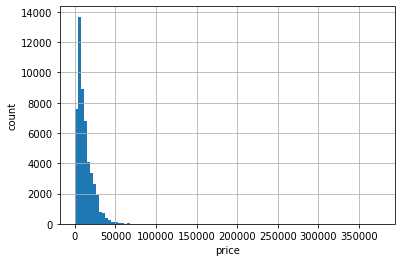

In [10]:
import matplotlib.pyplot as plt  
import pylab as pl

plt.show()  

pl = data["price"].hist(bins=100)
pl.set_xlabel("price")
pl.set_ylabel("count")


Text(0, 0.5, 'count')

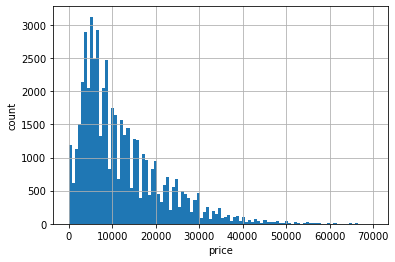

In [11]:
pl = data["price"].hist(range=(0,70000), bins=100)
pl.set_xlabel("price")
pl.set_ylabel("count")

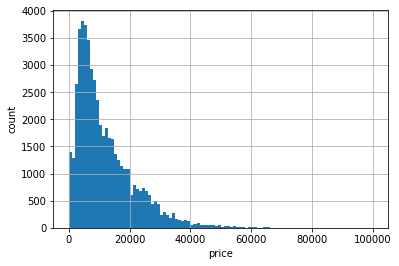

In [12]:
pl = data["price"].hist(range=(0,100000), bins=100)
pl.set_xlabel("price")
pl.set_ylabel("count")
plt.show() 

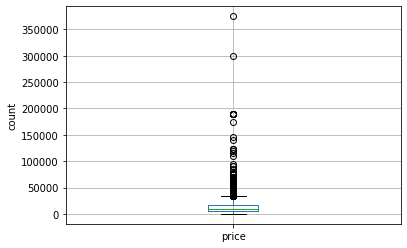

In [13]:
pl = data.boxplot(column='price')
pl.set_ylabel("count")
plt.show() 

Most of the values in the price column are between 10,000 and 20,000. There are a few outliers with a price above 100,000. There are also many values that are close to 0.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍:</b> 
    
As a whole I agree with your interpretation of the histograms!

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary </h2>
    <br/>
<b>Remarks and recommendations📌:</b> 
    
Ferdinand, it is important to pay attention to the appearance and formatting of the plots: so, please, add the comon titles to all the plots in your project, also add the x and y axis labels and don't forget about deleting of the technical string such as
`<matplotlib.axes._subplots.AxesSubplot at 0x7fa65c74dcd0>` you can delete them using `plt.show()` method. So, try to improve the visualization!

#### Vehicle_age

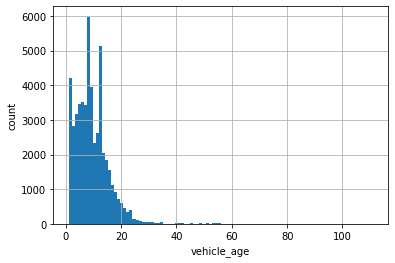

In [14]:
pl = data["vehicle_age"].hist(bins=100)
pl.set_xlabel("vehicle_age")
pl.set_ylabel("count")
plt.show()

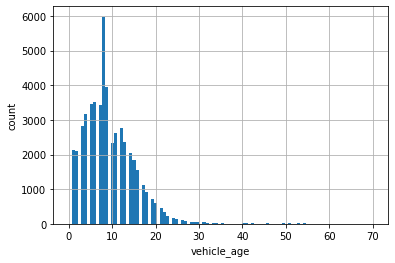

In [15]:
pl = data["vehicle_age"].hist(bins=100, range=(0,70))
pl.set_xlabel("vehicle_age")
pl.set_ylabel("count")
plt.show()

Text(0, 0.5, 'count')

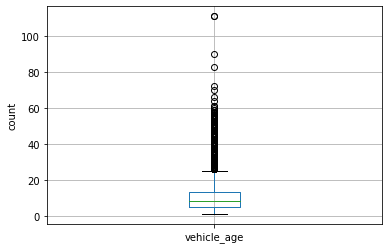

In [16]:
pl = data.boxplot(column='vehicle_age')
pl.set_ylabel("count")

Most of the values in the vehicle_age column are between 5 and 12 years. There are a few outliers, older than 25 years.

#### mileage_per_year


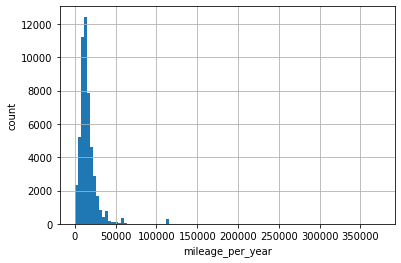

In [17]:
pl = data["mileage_per_year"].hist(bins=100)
pl.set_xlabel("mileage_per_year")
pl.set_ylabel("count")
plt.show()

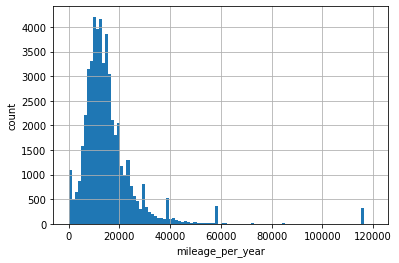

In [18]:
pl = data["mileage_per_year"].hist(bins=100, range=(0,120000))
pl.set_xlabel("mileage_per_year")
pl.set_ylabel("count")
plt.show()

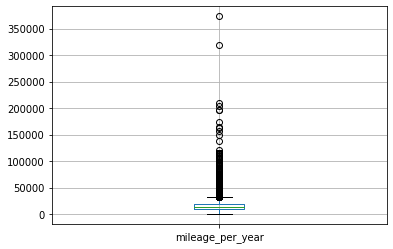

In [19]:
boxplot = data.boxplot(column='mileage_per_year')

In the mileage_per_year column, most values are between 15,000 and 25,000, with a few outliers having values above 50,000.

#### Cylinders

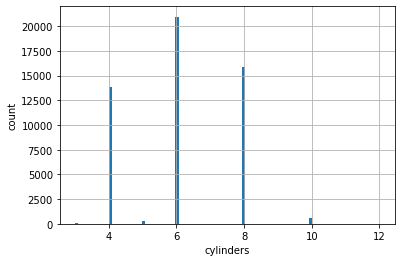

In [20]:
pl = data["cylinders"].hist(bins=100)
pl.set_xlabel("cylinders")
pl.set_ylabel("count")
plt.show()

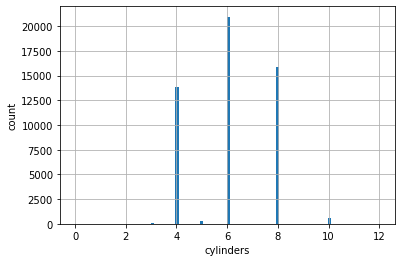

In [21]:
pl = data["cylinders"].hist(bins=100, range=(0,12))
pl.set_xlabel("cylinders")
pl.set_ylabel("count")
plt.show()

Most of the vehicles have 6 cylinders due to the histogram.

#### Condition

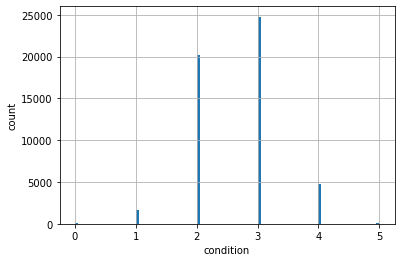

In [22]:
pl = data["condition"].hist(bins=100)
pl.set_xlabel("condition")
pl.set_ylabel("count")
plt.show()

Most of the vehicles are in very good or good condition.

### Removing the outliers

To do this, I create a function that calculates Q1, Q3 and IQR for a given column. This way I can determine the threshold values for the outliers with Q1 - 1.5 * IQR and Q3 + 1.5 *IQR and delete them.

In [23]:
def IQR(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    cleaned_data = data.loc[(data[col] > fence_low) & (data[col] < fence_high)]
    return cleaned_data

In [24]:
data_new = IQR(data, "price")
data_new = IQR(data_new, "vehicle_age")
data_new = IQR(data_new, "mileage_per_year")
data_new = IQR(data_new, "cylinders")
data_new = IQR(data_new, "condition")

print(len(data))
print(len(data_new))

51525
46119


<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary</h2>
    <br/>
<b>Remarks and recommendations📌:</b>

Ok, Ferdinand, you have deleted outliers using only histograms and the common sense (everything is alright with this approach, but anyway) there are statistical methods for identification of the outliers in data. For example, boxplots (graphical method) and IQR method or z-statistics. Below some links with information about it (for example, z-score).
    
I would like to recommend you to use one of this for detection and removal of outliers, these methods are more robust, so, please, try to add this action to your project!
    
    
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
    
http://colingorrie.github.io/outlier-detection.html#iqr-method
    
    
https://statisticsbyjim.com/basics/outliers/

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review</h2>
 
<b>Well done!👍:</b> 
    
Ok, it is great that you have tried to use the IQR method!

### Plot new histograms with the filtered data and compare them to the old

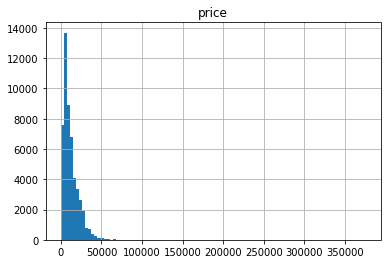

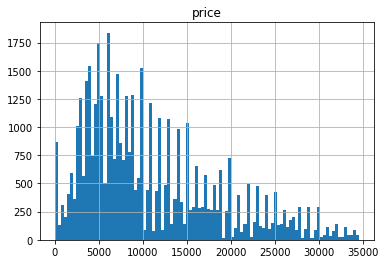

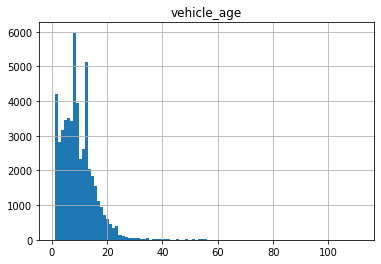

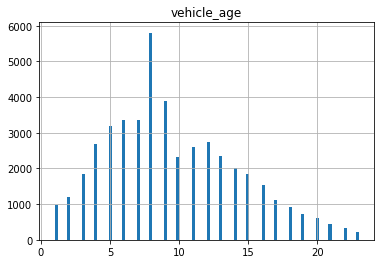

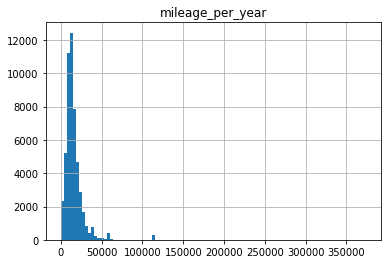

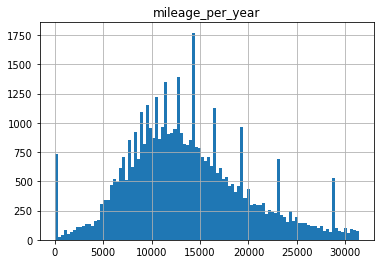

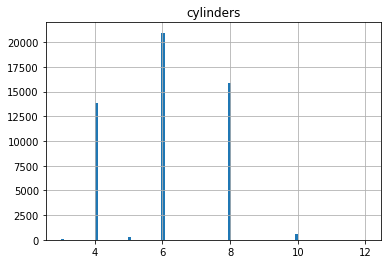

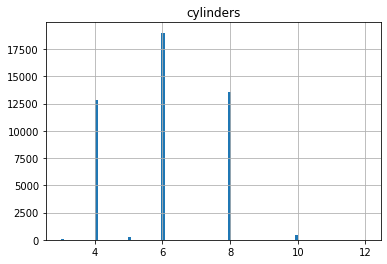

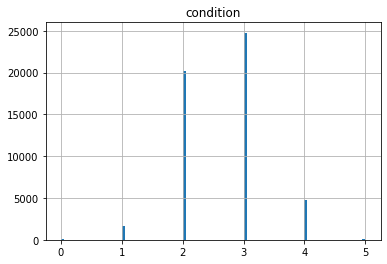

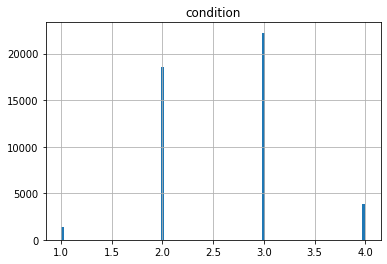

In [25]:
col_list = ["price", "vehicle_age", "mileage_per_year", "cylinders", "condition"]

for col in col_list:

    pl = data.hist(bins=100, column = col)
    pl = data_new.hist(bins=100, column = col)
    

In [26]:
print(len(data))
print(len(data_new))

51525
46119


After filtering the data, there are smaller ranges of values in most columns. In many columns there were high outliers, which made it harder to overview the whole dataset while seeing more details. As you can see in the cell above, 46.119 of 51.525 rows remain.

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary</h2>
    <br/>
<b>Remarks and recommendations📌:</b>
    
Ok, everything is alright with your histograms here, but it is important to pay more attention to the formatting of the plots!

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review</h2>
 
<b>Well done!👍:</b> 
    
This time your graphs look much more informative!

## Study the column "days_listed"

days_listed - mean: 39.571131204059064
days_listed - median: 33.0


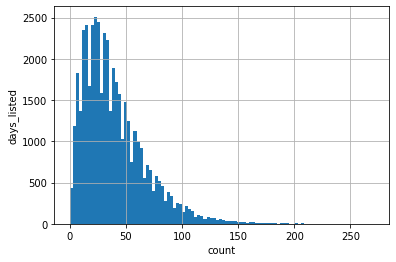

In [27]:
pl = data_new["days_listed"].hist(bins=100)
days_listed_mean = data_new["days_listed"].mean()
days_listed_median = data_new["days_listed"].median()


pl.set_xlabel("count")
pl.set_ylabel("days_listed")


print("days_listed - mean: {}".format(days_listed_mean))
print("days_listed - median: {}".format(days_listed_median))

To understand the reason why some advertisements lasted very long and some very short., I printed the following tables:
    -lasting_pivot
    -type_pivot
    -model_pivot
    -condition_pivot
    
lasting_pivot:
I put the advertisement into a new category "lasting", with the possible values "long" ("days_listed" > 200), "intermediate" (20 < "days_listed" < 200) and "short" ("days_listed" < 20). I generated a pivot table with index="lasting", to find out if the values in the numeric columns like price, year or odometer depend on the "lasting"- column. As you can see, the values in the pivot tables don't differ a lot. For example, if you look at the median price, for short-lasted ads it is 8700, for medium-lasted it is 8859, and for long-lasted it is 8987. In the other columns, the values are also almost the same, so I couldn't find dependencies on that way.

type_pivot / model_pivot / condition_pivot:
I made more pivots, to find out if the days_listed column is dependent on type, model or condition. The values in the I created more pivot tables to find out if the "days_listed" column is dependent on type, model or condition. The values in the "days_listed" column did not differ much in the grouped pivot tables, so I could not find any dependencies this way either.

In [28]:
data_new["lasting"] = "intermediate"
data_new.loc[data_new["days_listed"]<20, "lasting"] = "short"
data_new.loc[data_new["days_listed"]>200, "lasting"] = "long"

lasting_pivot= data_new.pivot_table(index="lasting", aggfunc=["median"])

type_pivot = data_new.pivot_table(index="type", aggfunc="mean").sort_values("days_listed", ascending=True)
model_pivot = data_new.pivot_table(index="model", aggfunc="mean").sort_values("days_listed", ascending=True)
condition_pivot = data_new.pivot_table(index="condition", aggfunc="mean").sort_values("days_listed", ascending=True)



print(lasting_pivot)
print(type_pivot)
print(model_pivot)
print(condition_pivot)

                median                                                    \
             condition cylinders day days_listed is_4wd mileage_per_year   
lasting                                                                    
intermediate         3         6  15          42  False          12916.0   
long                 3         6  16         219   True          12904.5   
short                3         6  15          12  False          12888.0   

                                                                        
             model_year month       odometer   price vehicle_age  year  
lasting                                                                 
intermediate       2011   7.0  115553.461738  8859.5           9  2018  
long               2011   6.5  108500.000000  8987.5           8  2018  
short              2011   7.0  115553.461738  8700.0           9  2018  
             condition  cylinders        day  days_listed    is_4wd  \
type                              

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary</h2>
    <br/>
<b>Remarks and recommendations📌:</b>
    
Ok, you have described your code decision, it is the correct step. But it is crucially important to interpret the result you get! So, please, explain what you got in these pivot tables.

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary</h2>
    <br/>
<b>Remarks and recommendations📌:</b>
    
Ok, there are some recommendations for you: you have analysed the days_listed, but it is also important to build plots for day,weekday,year columns and describe the distribution you get. So, please, try to add this action here! 

      days_listed
year             
2018    39.365042
2019    40.020624
      days_listed
year             
2018    39.365042
2019    40.020624
      days_listed
year             
2018    39.365042
2019    40.020624
      days_listed
year             
2018    39.365042
2019    40.020624


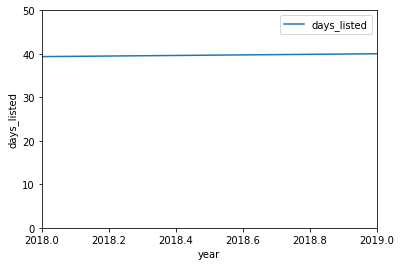

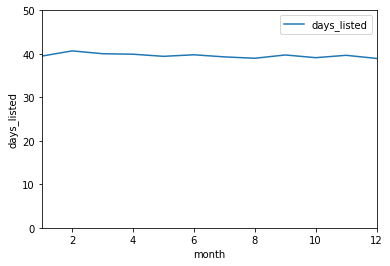

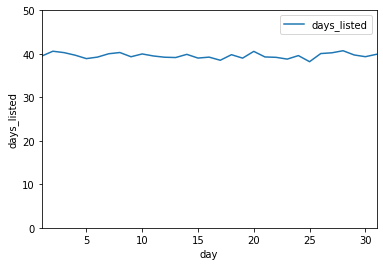

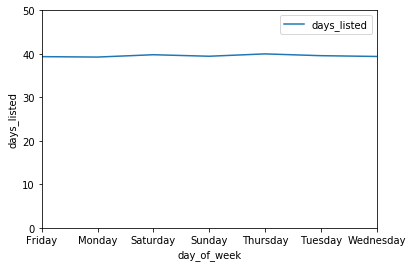

In [29]:
add_year_piv = data_new.pivot_table(index="year", values="days_listed", aggfunc="mean").sort_values("year")
print(add_year_piv)

add_month_piv = data_new.pivot_table(index="month", values="days_listed", aggfunc="mean").sort_values("month")
print(add_year_piv)

add_day_piv = data_new.pivot_table(index="day", values="days_listed", aggfunc="mean").sort_values("day")
print(add_year_piv)

add_dayOfWeek_piv = data_new.pivot_table(index="day_of_week", values="days_listed", aggfunc="mean").sort_values("day_of_week")
print(add_year_piv)

plot1  = add_year_piv.plot()
plot1.set_ylim(0,50)
plot2  = add_month_piv.plot()
plot2.set_ylim(0,50)
plot3  = add_day_piv.plot()
plot3.set_ylim(0,50)
plot4  = add_dayOfWeek_piv.plot()
plot4.set_ylim(0,50)

plot1.set_ylabel("days_listed")
plot2.set_ylabel("days_listed")
plot3.set_ylabel("days_listed")
plot4.set_ylabel("days_listed")
plt.show()


If we look at the average of the display durations as a function of the time columns, we see that it remains almost the same at 40 days. So the duration does not depend on day / month / year.If we look at the average of the display durations as a function of the time columns, we see that it remains almost the same at 40 days. So the duration does not depend on day / month / year.

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Needs fixing!🤔:</b> 
 
again, please, add the conclusion after this step of the analysis!

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review</h2>
 
<b>Well done!👍</b> 
    


## Investigation into which factors most strongly influence the price

To find out which factor influences the price the most, the two vehicle types that appear most frequently in the ads were identified. Histograms and boxplots were then printed to get the most influential factors.

### Identification of the most common types of vehicles in the ads

In [30]:
type_price_piv = data_new.pivot_table(index = "type", values="price", aggfunc='mean').sort_values("price", ascending=False)
print(type_price_piv)

                    price
type                     
bus          18107.428571
truck        14670.253400
pickup       14580.507316
offroad      14216.857955
coupe        13211.107684
convertible  13073.626543
SUV          10211.164787
other        10102.146789
wagon         8748.146128
van           8333.519126
mini-van      7637.793738
sedan         6726.254390
hatchback     6643.115108


This table shows us that vehicles with the type "bus", "truck" and "pickup" have the highest average prices. This makes sense because they are the largest vehicles in this list.

             condition
type                  
bus                 21
offroad            176
other              218
convertible        324
van                549
hatchback          973
mini-van          1086
wagon             1485
coupe             1913
pickup            6014
truck            10588
sedan            11333
SUV              11439


Text(0, 0.5, 'advertisement count')

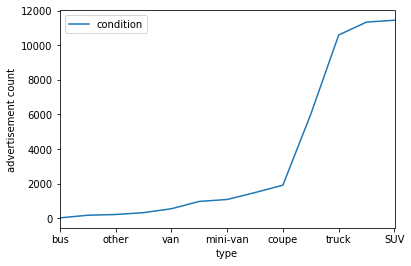

In [31]:
type_count_piv = data_new.pivot_table(index="type", values="condition", aggfunc="count").sort_values("condition")
print(type_count_piv)
plt.show()

pl = type_count_piv.plot()
pl.set_ylabel("advertisement count")


The pivot table and chart show that Sedan and SUV are the most common vehicles in the ads.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍:</b> 
    
Yes, agree with you, the sedan and SUV are the most advertised types of vehicles!

### Analyse the factors that impact the price most


possible factors:

    -age
    -mileage
    -condition
    -transmission type
    -color

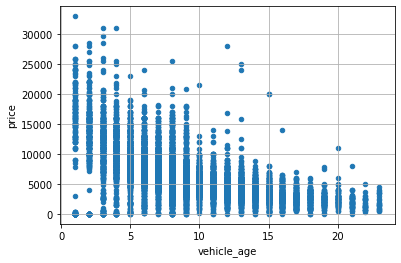

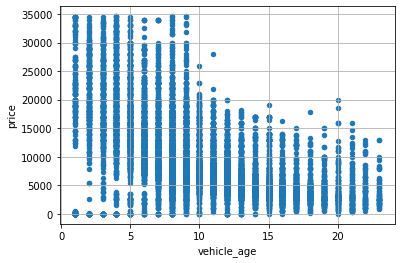

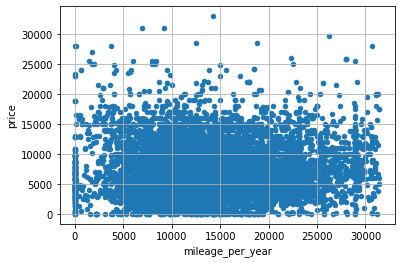

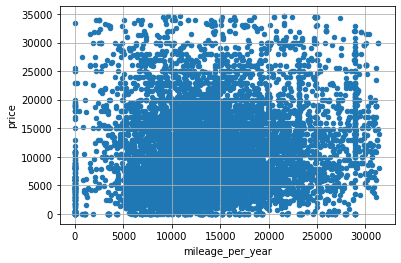

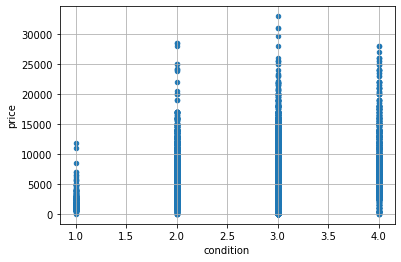

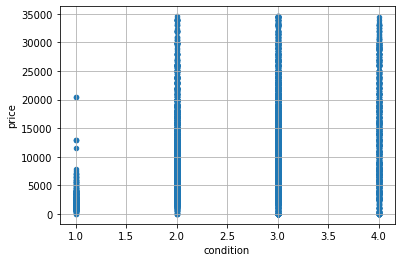

In [32]:
#price_multstation_stat_full.plot(x='count', y='time_spent', kind='scatter', grid=True)i = data.pivot_table(index="id", values= ["time_spent", "too_fast", "too_slow"], aggfunc = "mean")
#data_new[""].plot(x='condition', y='price', kind='scatter', grid=True)
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  
data_sedan = data_new.loc[data["type"] == "sedan"]
data_suv = data_new.loc[data["type"] == "SUV"]


numeric_columns = ["vehicle_age", "mileage_per_year", "condition"]

#In this loop, I print the correlation index and histograms to see where the greatest dependence is for the price.
for col in numeric_columns:
    data_sedan.plot(x=col, y='price', kind='scatter', grid=True)
    data_suv.plot(x=col, y='price', kind='scatter', grid=True)

In [33]:
data_sedan.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,day,month,year,vehicle_age,mileage_per_year
price,1.000000,0.622001,0.292056,-0.028987,-0.535242,0.061095,0.000221,0.003037,-0.038094,0.035911,-0.617937,0.117489
model_year,0.622001,1.000000,0.297254,-0.100013,-0.567007,0.072242,-0.000335,0.010863,-0.050109,0.051194,-0.994172,0.429136
condition,0.292056,0.297254,1.000000,-0.039178,-0.313262,0.022567,-0.006528,-0.003948,-0.009657,0.012536,-0.295812,-0.005505
cylinders,-0.028987,-0.100013,-0.039178,1.000000,0.050196,0.190307,0.007697,-0.013516,-0.005128,0.004170,0.100433,-0.052625
odometer,-0.535242,-0.567007,-0.313262,0.050196,1.000000,-0.054810,0.007334,-0.013193,0.020100,-0.012828,0.565451,0.371762
is_4wd,0.061095,0.072242,0.022567,0.190307,-0.054810,1.000000,0.007181,-0.014874,0.006742,-0.003886,-0.072639,0.020903
days_listed,0.000221,-0.000335,-0.006528,0.007697,0.007334,0.007181,1.000000,0.016509,-0.007210,0.012564,0.001691,0.006139
day,0.003037,0.010863,-0.003948,-0.013516,-0.013193,-0.014874,0.016509,1.000000,0.029045,-0.055645,-0.016866,0.001745
month,-0.038094,-0.050109,-0.009657,-0.005128,0.020100,0.006742,-0.007210,0.029045,1.000000,-0.821649,-0.038597,0.080894
year,0.035911,0.051194,0.012536,0.004170,-0.012828,-0.003886,0.012564,-0.055645,-0.821649,1.000000,0.056764,-0.094794


In [34]:
data_suv.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,day,month,year,vehicle_age,mileage_per_year
price,1.000000,0.577298,0.255585,0.002393,-0.485665,0.118704,-0.017194,0.001743,-0.013469,0.009336,-0.575085,0.185750
model_year,0.577298,1.000000,0.300925,-0.241808,-0.568084,-0.066460,-0.014707,-0.011813,-0.028198,0.026451,-0.995155,0.500125
condition,0.255585,0.300925,1.000000,-0.090826,-0.305859,-0.010528,-0.010892,-0.008172,-0.003558,0.002275,-0.300026,0.012233
cylinders,0.002393,-0.241808,-0.090826,1.000000,0.208385,0.117015,0.013478,0.001999,0.003211,-0.007334,0.240544,-0.056101
odometer,-0.485665,-0.568084,-0.305859,0.208385,1.000000,0.028306,0.013536,0.012240,0.014758,-0.011480,0.565680,0.292025
is_4wd,0.118704,-0.066460,-0.010528,0.117015,0.028306,1.000000,-0.005226,0.009306,-0.000418,-0.005638,0.065757,-0.034282
days_listed,-0.017194,-0.014707,-0.010892,0.013478,0.013536,-0.005226,1.000000,-0.014570,-0.006027,-0.000280,0.014646,-0.003754
day,0.001743,-0.011813,-0.008172,0.001999,0.012240,0.009306,-0.014570,1.000000,0.020850,-0.061229,0.005765,0.009268
month,-0.013469,-0.028198,-0.003558,0.003211,0.014758,-0.000418,-0.006027,0.020850,1.000000,-0.818696,-0.052387,0.097671
year,0.009336,0.026451,0.002275,-0.007334,-0.011480,-0.005638,-0.000280,-0.061229,-0.818696,1.000000,0.071963,-0.121325


unknown    2037
silver     1912
black      1647
grey       1523
white      1376
blue       1169
red         898
custom      270
brown       248
green       196
purple       26
yellow       22
orange        9
Name: paint_color, dtype: int64
unknown    2048
black      2008
white      1778
silver     1475
grey       1097
blue        975
red         844
green       411
brown       354
custom      290
orange       77
yellow       43
purple       39
Name: paint_color, dtype: int64


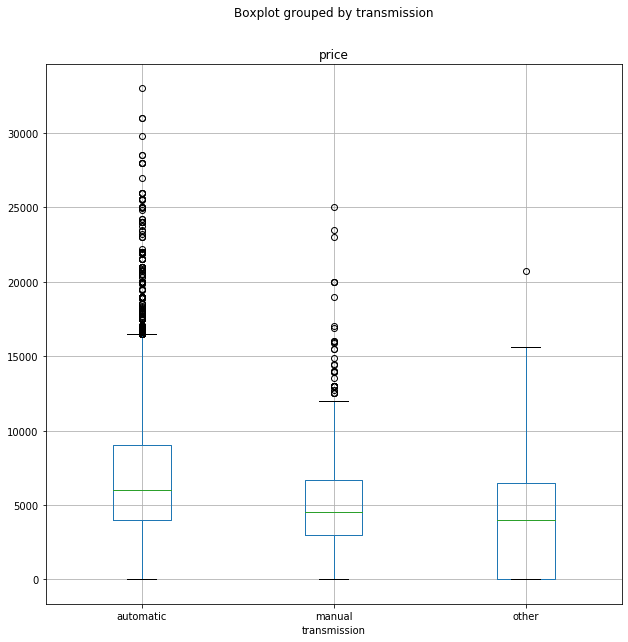

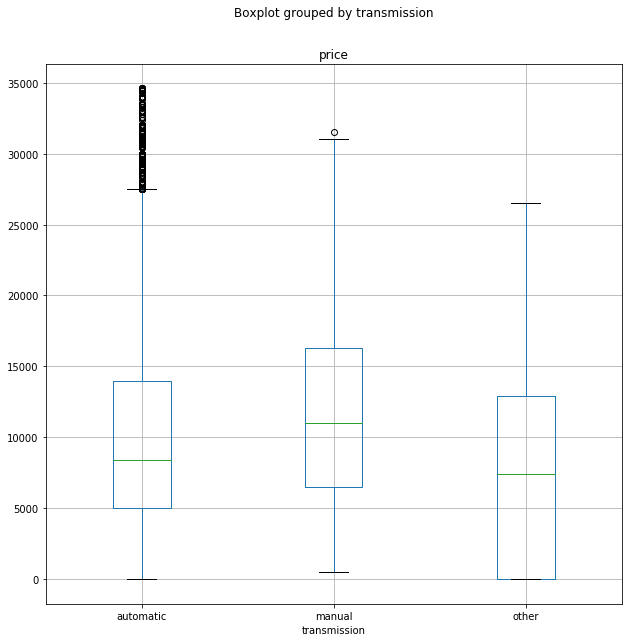

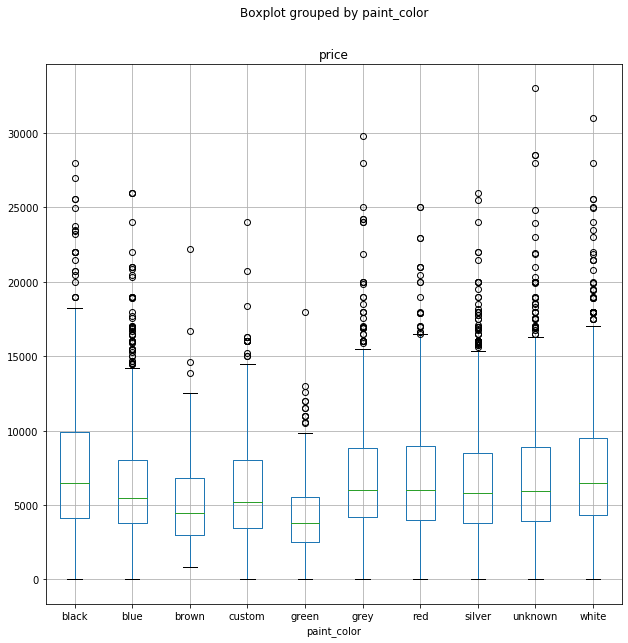

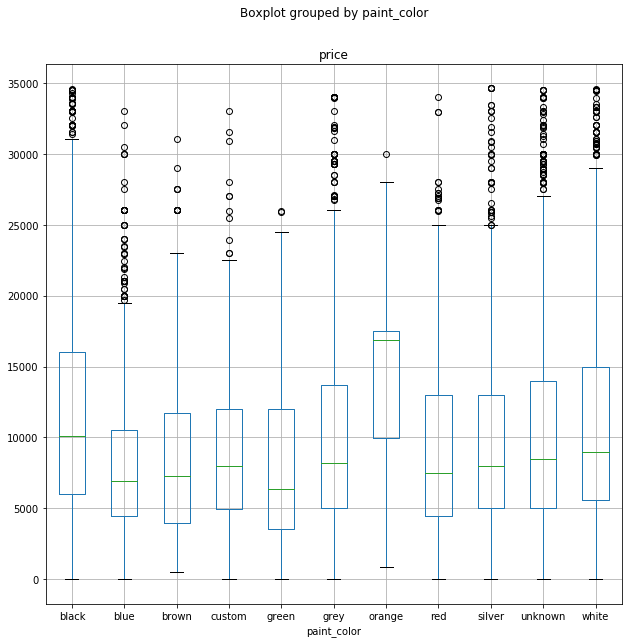

In [35]:
categorical_columns = ["transmission", "paint_color"]

#data_sedan: too few values for the colors: purple, yellow, orange
#because of that, I will not include these values in the boxplot.
print(data_sedan["paint_color"].value_counts())


#data_sedan: too few values for the colors: purple, yellow
#because of that, I will not include these values in the boxplot.
print(data_suv["paint_color"].value_counts())



for col in categorical_columns:
    if col == "paint_color":
        data_sedan[~data_sedan["paint_color"].isin(["purple", "yellow", "orange"])].boxplot(column=['price'], by=col,
                     return_type='axes', figsize=(10,10))
        data_suv[~data_suv["paint_color"].isin(["purple", "yellow"])].boxplot(column=['price'], by=col,
                     return_type='axes', figsize=(10,10))
    else:
        data_sedan.boxplot(column=['price'], by=col,
                     return_type='axes', figsize=(10,10))
        data_suv.boxplot(column=['price'], by=col,
                     return_type='axes', figsize=(10,10))

The correlation indices and the graphs shown above show that the price is most dependent on the age of the vehicle. This can be seen from the increasingly high concentration of expensive prices for new vehicles. Likewise, the correlation index (-0.6) has the highest amount for age. The price is less dependent on the categorical variables "paint_color" and "transmission". For SUVs, however, black vehicles have a noticeably higher median compared to the other colors.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, everything is alright at this step of the analysis!

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary</h2>
    <br/>
<b>Remarks and recommendations📌:</b>
    
But again remind you about the plot formatting. And one more tip: you can create one common correlation matrix for numerical variables, it is more convenient and optimal, more details by the link:
    
    
https://datatofish.com/correlation-matrix-pandas/
    
https://realpython.com/numpy-scipy-pandas-correlation-python/

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review</h2>
 
<b>Well done!👍:</b> 
    
Ok, it is great that you have added the correlation matrix here!

### Overall conclusion

The data set at hand had a lot of outliers, so some columns had to be cleaned to be able to display clear histograms. As already mentioned, the age of the vehicles has the greatest influence on the price. This is a realistic result, since cars lose value very quickly after a new purchase, even if the condition is like new.
Why some ads are removed very quickly and some very late could not be determined by the data. This may have to do with the meaningfulness and volume of the ads.

<div style="border:solid Chocolate 2px; padding: 40px">

**The overall review conclusion**

Ferdinand, thank you for submitting your project! I can see that you've worked really hard on it! But there are several things in your project which I suppose it is important to fix in order to make your project really ideal! My comments will navigate you!

**Good things and practices in your project I want to highlight🙂**:
* You used different methods for working with your data. It is really great that you can apply these methods on practice, keep it up!
* You used visualization a lot, good job!
* I am really impressed with the automation tools that you use for completing the tasks!
    
**What is worth working on👀**:
* Pay attention to formatting of the project, especially when we talk about the introduction!
* Try to pay more attention to the preprocessing of missing values!
* Add the conclusions after each of the step.
* Pay more attention to the formatting of your plots!

 
**Good luck! I will wait for your work for a second iteration of the review!😉**

![gif](https://media.giphy.com/media/xT9DPIBYf0pAviBLzO/giphy.gif)  

<div style="border:solid Chocolate 2px; padding: 40px">

**The overall review conclusion: second iteration of the review**

Ferdinand, thank you for submitting your project with corrections! And thank you for feedback! I can see your progress! I hasten to say that your project has been accepted and you can proceed to the next sprint!
    
**I wish you exciting and cool projects in the next sprints😉**

![gif](https://media.giphy.com/media/ln4bohPvHhwgo/giphy.gif)  

## Project completion checklist

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn